In [1]:
%run packages&parameters.ipynb
%run Graphical_Functions.ipynb
%run Dataframe_Functions.ipynb
processors=1

In [2]:
plt.rcParams['image.cmap'] = 'jet'
os.getcwd()

'C:\\Users\\nikbo14\\Google Drive\\IVM sharing\\IVM Tracking\\Scripts\\New pipeline 210920'

In [3]:
path = Path('G:\\Tracking exp\\Intravital\\MMI tracking\\New data ASA')
    #'C:\\Users\\nikbo14\Google Drive\IVM sharing\IVM Tracking\Scripts\Abigail code 210920')
#Path('C:\\Users\\nikbo14\\Google Drive\\Forskning\Mina projekt\Aktuella projekt\Tracking study\Data')
#C:\Users\nikbo14\Google Drive\Forskning\Mina projekt\Aktuella projekt\Tracking study\Data
datafiles = [os.path.join(root, name)
             for root, dirs, files in os.walk(path)
             for name in files
             if name.endswith("tracks.csv")
            ]
metafiles = [os.path.join(root, name)
             for root, dirs, files in os.walk(path)
             for name in files
             if name.endswith("md.csv")
]
df_names = [name for root, dirs, files in os.walk(path)
             for name in files
             if name.endswith("csv")
]

In [4]:
#for c,name in enumerate(datafiles):
 #   print(c,name)
#metafiles

In [5]:
#meta_list=np.arange(1,352,2)


df_meta_=[]
for mi in metafiles:
    #print(mi)
    df_meta_.append(pd.read_csv((mi),sep=','))
        
    
                 


df_meta=pd.concat(df_meta_, ignore_index=True,names='pid').reset_index()

In [6]:
df_names

['210922_185235_problem-children_210601_IVMTR114_Inj1_ASA_exp3_platelet-coords_tracks.csv',
 '210922_185235_problem-children_210601_IVMTR114_Inj1_ASA_exp3_seg-md.csv',
 '210922_185235_problem-children_210601_IVMTR114_Inj2_ASA_exp3_platelet-coords_tracks.csv',
 '210922_185235_problem-children_210601_IVMTR114_Inj2_ASA_exp3_seg-md.csv',
 '210922_185235_problem-children_210601_IVMTR114_Inj3_ASA_exp3_platelet-coords_tracks.csv',
 '210922_185235_problem-children_210601_IVMTR114_Inj3_ASA_exp3_seg-md.csv']

In [7]:
df_meta

,index,Unnamed: 0,file,px_microns,axes,cohort,treatment,scale,translate,t,z,y,x,channel_0,channel_1,channel_2,channel_3,frame_rate,roi_t,roi_x,roi_y,roi_size,platelets_info_path,platelet_tracks
0,0,0,210601_IVMTR114_Inj1_ASA_exp3,0.504248,"['x', 'y', 'c', 't', 'z']",timeseries_seg,problem-children,"[1, 2.0, -0.504248154773493, -0.504248154773493]","(0, 3434.25, -3464.812472377986, 5358.18752762...",1,2.0,0.504248,0.504248,GaAsP Alexa 488,GaAsP Alexa 568,Alxa 647,TD,0.321884,356672.352139,101.992593,177.865132,37.5,/home/abigail/data/plateseg-training/timeserie...,210922_185235_problem-children_210601_IVMTR114...
1,1,0,210601_IVMTR114_Inj2_ASA_exp3,0.504248,"['x', 'y', 'c', 't', 'z']",timeseries_seg,problem-children,"[1, 2.0, -0.504248154773493, -0.504248154773493]","(0, 3431.875, -3660.312472377986, 5055.3875276...",1,2.0,0.504248,0.504248,GaAsP Alexa 488,GaAsP Alexa 568,Alxa 647,TD,0.321853,356672.352139,101.992593,177.865132,37.5,/home/abigail/data/plateseg-training/timeserie...,210922_185235_problem-children_210601_IVMTR114...
2,2,0,210601_IVMTR114_Inj3_ASA_exp3,0.504248,"['x', 'y', 'c', 't', 'z']",timeseries_seg,problem-children,"[1, 2.0, -0.504248154773493, -0.504248154773493]","(0, 3433.0, -3875.0124723779863, 4736.08752762...",1,2.0,0.504248,0.504248,GaAsP Alexa 488,GaAsP Alexa 568,Alxa 647,TD,0.321878,356672.352139,101.992593,177.865132,37.5,/home/abigail/data/plateseg-training/timeserie...,210922_185235_problem-children_210601_IVMTR114...


In [8]:
treatments=df_meta.treatment.unique()
for nr,treatment in enumerate(treatments):
    exp=df_meta[df_meta.treatment==treatment].index.unique()
    print(nr,treatment,exp,len(exp))

0 problem-children Int64Index([0, 1, 2], dtype='int64') 3


In [9]:
list(df_meta.treatment.unique())

['problem-children']

In [10]:
inh_list1=['Control', 'Cangrelor', 'Saline', 'Bivalirudin']
inh_list2=['SQ', 'DMSO','CMFDA', 'Injury 2-4 (MIPS effect)', 'DMSO 20ul']
inh_list3=['Aspirin DMSO (ASAD)', 'Vehicle (Salgav)','Vehicle DMSO (SalgavDMSO)', 'Aspirin (ASA)']
inh_list4=['PAR4-+', 'PAR4+-', 'PAR4--', 'PAR4-- Biva']

In [11]:
exp_list1=['problem-children']
filelist = [[file for file in df_meta[df_meta.treatment==treatment].file.unique()] for 
            treatment in df_meta.treatment.unique() if treatment in exp_list1]


In [12]:
filelist

[['210601_IVMTR114_Inj1_ASA_exp3',
  '210601_IVMTR114_Inj2_ASA_exp3',
  '210601_IVMTR114_Inj3_ASA_exp3']]

In [13]:
filelist = [item for sublist in filelist for item in sublist]

In [14]:
filelist

['210601_IVMTR114_Inj1_ASA_exp3',
 '210601_IVMTR114_Inj2_ASA_exp3',
 '210601_IVMTR114_Inj3_ASA_exp3']

In [15]:
[treatment for treatment in df_meta.treatment.unique() if treatment in exp_list1]

['problem-children']

In [16]:
pathlist=[path for path in datafiles for file in filelist if file in path]

In [17]:
df_meta=df_meta[df_meta.treatment.isin(exp_list1)]

In [18]:
len(pathlist)

3

In [19]:
#exp_list=np.arange(99,176,2)
#meta_list=np.arange(1,202,2)

df_exp_=[]
#df_meta_=[]
for path in pathlist:
    df_exp_.append(pd.read_csv((path),sep=','))
    #df_meta_.append(pd.read_csv((datafiles[mi]),sep=','))
        
    
                 

df_exp=pd.concat(df_exp_, ignore_index=True,names='pid').reset_index()
#df_meta=pd.concat(df_meta_, ignore_index=True,names='pid').reset_index()

In [20]:
df_exp.head(5).T

,0,1,2,3,4
index,0,1,2,3,4
Unnamed: 0,0,359,358,357,356
pid,0,359,358,357,356
z_pixels,6.21408,10,2,13,12
y_pixels,241.977,158.407,479.051,370.432,46.4444
x_pixels,429.683,192.475,98.9388,385.494,387.972
inertia_tensor_eigvals-0,13.6612,10.5246,18.8406,20.4213,5.94059
inertia_tensor_eigvals-1,11.1755,5.70417,14.5884,17.8458,3.45353
inertia_tensor_eigvals-2,5.74971,4.82039,4.2522,2.57548,2.48705
area,341,59,98,81,36


In [21]:
#df_exp.loc[df_exp.particle==0,'flatness'].unique()
#df_exp[df_exp.particle==0].label.value_counts()
#df_exp[df_exp.particle==0].t.unique()
#np.sort(df_exp[df_exp.t==193].label.value_counts())
#df_exp['xs'].describe()
#df_exp['ys'].describe()
#sns.displot(data=df_exp, x="flatness")
#sns.displot(data=df_exp, x="volume",height=8)

In [22]:
df_exp.treatment.unique()

array(['problem-children'], dtype=object)

In [23]:
df_exp.columns

Index(['index', 'Unnamed: 0', 'pid', 'z_pixels', 'y_pixels', 'x_pixels',
       'inertia_tensor_eigvals-0', 'inertia_tensor_eigvals-1',
       'inertia_tensor_eigvals-2', 'area', 'GaAsP Alexa 488: mean_intensity',
       'GaAsP Alexa 488: max_intensity', 't',
       'GaAsP Alexa 568: mean_intensity', 'GaAsP Alexa 568: max_intensity',
       't.1', 'Alxa 647: mean_intensity', 'Alxa 647: max_intensity', 't.2',
       'TD: mean_intensity', 'TD: max_intensity', 't.3', 'label', 'zs', 'ys',
       'xs', 'volume', 'elongation', 'flatness', 'file', 'cohort', 'treatment',
       'particle', 'track_no_frames'],
      dtype='object')

In [24]:

df_dict={'pid':'pid',
         'path':'file',
         'frame':'t',
         'xs':'ys',
         'ys':'xs',
         'zs':'zs',
         'particle':'particle',
         'nrtracks':'track_no_frames',
         'c0_mean':'GaAsP Alexa 488: mean_intensity',
         'c0_max':'GaAsP Alexa 488: max_intensity',
         'c1_mean':'GaAsP Alexa 568: mean_intensity',
         'c1_max':'GaAsP Alexa 568: max_intensity',
         'c2_mean':'Alxa 647: mean_intensity',
         'c2_max':'Alxa 647: max_intensity',
         
             'vol':'volume',
             'elong':'elongation',
             'flatness':'flatness',
         
             'treatment':'treatment',
             'cohort':'cohort',
         
             'eigval_0':'inertia_tensor_eigvals-0',
             'eigval_1':'inertia_tensor_eigvals-1',
             'eigval_2':'inertia_tensor_eigvals-2',
            }

df=pd.DataFrame()
for new,old in df_dict.items():
    df[new]=df_exp[old]

#print(new,old)

In [25]:
del df_exp

In [26]:
#col_var='nrtracks'
#df_map=df[(df.nrtracks>10)]
#plt_map(df_map,col_var)
#df[(df.path=='200519_IVMTR69_Inj4_dmso_exp3')&(df.nrtracks>10)]

In [27]:

for index, row in df_meta.iterrows():
    rot_angle=45
    file=row.file
    
    adjust_x=row.roi_x#*row.px_microns
    adjust_y=row.roi_y#*row.px_microns
    
    #print(file,adjust_x,adjust_y)
    
    xs_1=df.loc[df.path==file,'xs'].copy()
    ys_1=df.loc[df.path==file,'ys'].copy()
    #print(xs_1,xs_1-adjust_x)
    #zs_1=df_exp.loc[df_exp.file==file,'zs'].copy()
    df.loc[df.path==file,'xs']=xs_1-adjust_x#+150
    df.loc[df.path==file,'ys']=ys_1-adjust_y


        
rot = Rot.from_euler('z', -rot_angle, degrees=True)#Förut -rot_angle
xyz = df[['xs', 'ys', 'zs']].to_numpy()
xyz_rot = rot.apply(xyz)
df['xs'], df['ys'] =  xyz_rot[:,0], xyz_rot[:,1]
    
    #rot = Rot.from_euler('z', -rot_angle, degrees=True)#Förut -rot_angle
    #xyz = df_exp[['xs', 'ys', 'zs']].to_numpy()
    #xyz_rot = rot.apply(xyz)
    #df_exp['xs'], df_exp['ys'] =  xyz_rot[:,0], xyz_rot[:,1]

In [28]:
df.path.unique()

array(['210601_IVMTR114_Inj1_ASA_exp3', '210601_IVMTR114_Inj2_ASA_exp3',
       '210601_IVMTR114_Inj3_ASA_exp3'], dtype=object)

In [29]:
df_map=df[(df.path==filelist[0])&(df.nrtracks>2)]
col_var='nrtracks'
x_var='frame'
plt_map(df_map,col_var,x_var,vmin=2,vmax=100)

KeyError: 'x_s'

In [30]:
#import zarr
#seg = zarr.open('C:\\Users\\nikbo14\Google Drive\IVM sharing\IVM Tracking\Scripts\Abigail code 210920\210511_IVMTR105_Inj5_DMSO2_exp3.nd2_segmentations\MIPS Cohort\DMSO 20ul\210511_IVMTR105_Inj5_DMSO2_exp3_labels.zarr')

In [31]:
#import napari
#viewer = napari.Viewer()

#for n,i in step_names[:-2]:
#    viewer.add_image((insp_steps[n]['data']),name=i,scale=[1,1,4])
#viewer.add_image(seg,name='segmentation',scale=[1,1,1])
#viewer.add_labels(seg, name='segmentation',scale=[1,1,1])
#labels_layer = viewer.add_labels(insp_steps[5]['data'].transpose(), name='labels intensity peak1',scale=[4,1,1])
#labels_layer = viewer.add_labels(insp_steps[5]['data'], name='labels intensity peak1',scale=[1,1,4])

In [32]:
pc=df.copy()
del df

In [33]:
pc=pc.drop('pid',axis=1).reset_index().rename({'index':'pid'},axis=1)

In [34]:
pc

,pid,path,frame,xs,ys,zs,particle,nrtracks,c0_mean,c0_max,c1_mean,c1_max,c2_mean,c2_max,vol,elong,flatness,treatment,cohort,eigval_0,eigval_1,eigval_2
0,0,210601_IVMTR114_Inj1_ASA_exp3,0,41.595911,13.278221,12.428152,0,107,399.953079,1773,211.137830,391,637.002933,2245,173.409549,0.761000,0.696784,problem-children,timeseries_seg,13.661179,11.175504,5.749707
1,1,210601_IVMTR114_Inj1_ASA_exp3,0,-72.779990,-41.502866,20.000000,1,1,153.440678,357,182.847458,262,228.559322,437,30.003412,0.736198,0.393620,problem-children,timeseries_seg,10.524562,5.704174,4.820388
2,2,210601_IVMTR114_Inj1_ASA_exp3,0,8.197179,-189.181779,4.000000,2,1,148.285714,301,160.581633,257,239.928571,587,49.836176,0.879947,0.841737,problem-children,timeseries_seg,18.840587,14.588383,4.252204
3,3,210601_IVMTR114_Inj1_ASA_exp3,0,71.641604,-48.279618,26.000000,3,1,148.987654,300,192.530864,287,263.666667,647,41.191125,0.934817,0.925031,problem-children,timeseries_seg,20.421277,17.845798,2.575480
4,4,210601_IVMTR114_Inj1_ASA_exp3,0,-42.994867,68.124232,24.000000,4,1,134.861111,210,170.027778,253,218.694444,500,18.307167,0.762460,0.529011,problem-children,timeseries_seg,5.940586,3.453534,2.487053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754311,754311,210601_IVMTR114_Inj3_ASA_exp3,193,4.864460,-23.441661,14.968254,86170,12,204.904762,503,194.587302,329,502.293651,1313,64.075083,0.852656,0.835317,problem-children,timeseries_seg,8.881084,8.021107,2.424339
754312,754312,210601_IVMTR114_Inj3_ASA_exp3,193,-40.060126,-5.914737,17.346154,75898,36,143.935897,396,172.891026,285,281.314103,843,79.331055,0.788232,0.754039,problem-children,timeseries_seg,7.746866,6.799915,2.933659
754313,754313,210601_IVMTR114_Inj3_ASA_exp3,193,3.201429,-150.019077,6.000000,91173,1,196.553191,724,187.531915,272,414.042553,1100,47.802046,0.804274,0.673842,problem-children,timeseries_seg,15.621096,10.104611,5.516484
754314,754314,210601_IVMTR114_Inj3_ASA_exp3,193,-10.905531,1.750348,23.425414,88941,4,198.441989,727,168.082873,278,431.243094,1130,92.044365,0.758831,0.662897,problem-children,timeseries_seg,9.815398,7.427209,4.163455


# Z-floor

In [35]:
#NB subtraherar hojden pa den andra percentilen av trombocyterna efter z-pos fran z-pos for varje trombocyt och lagger
#detta varde som zf
def zfloor(pc):
    var='zs'
    df=pc
    #df=pc[~(pc.c==625)]
#NB Tar ut frame 1-29
    df=df[df.frame<30]
#NB Definierar andra percentilen som botten pa proppen
    floor=np.percentile(df[var], 2)
#NB Subtraherar detta varde fran z-pos
    zf=pc[var]-floor
    return pd.DataFrame({'zf' : (zf)})
#Anropar funktionen zfloor med pc sorterat pa path med index satt till 'pid', far tillbaka en dataframe med en kolumn 'zf'
z_grp=pc.set_index('pid').groupby(['path']).apply(zfloor).reset_index()

#z_grp=t_grp.drop(['index'], axis=1)
#Lagger in den nya kolumnen i pc med funktionen concat, notera axis = 1 och set_index('pid').  
pc=pd.concat([pc.set_index('pid'), z_grp.set_index('pid')], axis=1).reset_index()

In [36]:
ls_df=[]
flist=pc.path.unique()
for n,file in enumerate(flist):
    pc_=pc[pc.path==file]#pd.read_pickle(files[n])
    print(f"Observations in file number {n} = {pc_.shape[0]}")
    #ls_df.append(pc_)
#pc=pd.concat(ls_df)
print(f"Total number of observations = {pc.shape[0]}")
print(f"Average number of observations per exp = {int(pc.shape[0]/len(flist))}")

Observations in file number 0 = 165019
Observations in file number 1 = 362620
Observations in file number 2 = 226677
Total number of observations = 754316
Average number of observations per exp = 251438


In [37]:
print('Columns ', pc.columns, '\nDimensions ',pc.shape, '\nFrames ', len(pd.unique(pc.frame)))

Columns  Index(['pid', 'path', 'frame', 'xs', 'ys', 'zs', 'particle', 'nrtracks',
       'c0_mean', 'c0_max', 'c1_mean', 'c1_max', 'c2_mean', 'c2_max', 'vol',
       'elong', 'flatness', 'treatment', 'cohort', 'eigval_0', 'eigval_1',
       'eigval_2', 'zf'],
      dtype='object') 
Dimensions  (754316, 23) 
Frames  194


# Load PC collection

# Ytterligare Filter 

In [38]:
# OM DET BEHÖVS, renso objekt från mindre objekt (skräp), och se hur många objekt före och efter


print(f"{pc.shape[0]} \t\t objects\n")
for n in list(np.around(np.geomspace(4, 1024, num=9)).astype(int)):
        if n<129:
            print(f"{len(pc[pc['vol']<n])} \t\t smaller than \t\t {n} \t\t pixels")
        else:
            print(f"{len(pc[pc['vol']>n])} \t\t larger than \t\t {n} \t\t pixels")
#print(f"{len(pc[pc['size']>1024])} \t\t larger than \t\t 1024 \t\t pixels")
    #print(f"There are {k}")
    #print('hello')  

    
    
    

754316 		 objects

3979 		 smaller than 		 4 		 pixels
23885 		 smaller than 		 8 		 pixels
81108 		 smaller than 		 16 		 pixels
193032 		 smaller than 		 32 		 pixels
451278 		 smaller than 		 64 		 pixels
712698 		 smaller than 		 128 		 pixels
713 		 larger than 		 256 		 pixels
2 		 larger than 		 512 		 pixels
0 		 larger than 		 1024 		 pixels


# Reset index, drop columns

In [39]:
pc['pid']=list(range(pc.shape[0]))

In [40]:
pc.head(3).T

,0,1,2
pid,0,1,2
path,210601_IVMTR114_Inj1_ASA_exp3,210601_IVMTR114_Inj1_ASA_exp3,210601_IVMTR114_Inj1_ASA_exp3
frame,0,0,0
xs,41.5959,-72.78,8.19718
ys,13.2782,-41.5029,-189.182
zs,12.4282,20,4
particle,0,1,2
nrtracks,107,1,1
c0_mean,399.953,153.441,148.286
c0_max,1773,357,301


In [41]:
pc.tail(3).T


,754313,754314,754315
pid,754313,754314,754315
path,210601_IVMTR114_Inj3_ASA_exp3,210601_IVMTR114_Inj3_ASA_exp3,210601_IVMTR114_Inj3_ASA_exp3
frame,193,193,193
xs,3.20143,-10.9055,21.1483
ys,-150.019,1.75035,23.8344
zs,6,23.4254,40
particle,91173,88941,91174
nrtracks,1,4,1
c0_mean,196.553,198.442,135
c0_max,724,727,236


In [42]:
pc.set_index('pid')

,path,frame,xs,ys,zs,particle,nrtracks,c0_mean,c0_max,c1_mean,c1_max,c2_mean,c2_max,vol,elong,flatness,treatment,cohort,eigval_0,eigval_1,eigval_2,zf
pid,,,,,,,,,,,,,,,,,,,,,,
0,210601_IVMTR114_Inj1_ASA_exp3,0,41.595911,13.278221,12.428152,0,107,399.953079,1773,211.137830,391,637.002933,2245,173.409549,0.761000,0.696784,problem-children,timeseries_seg,13.661179,11.175504,5.749707,7.041967
1,210601_IVMTR114_Inj1_ASA_exp3,0,-72.779990,-41.502866,20.000000,1,1,153.440678,357,182.847458,262,228.559322,437,30.003412,0.736198,0.393620,problem-children,timeseries_seg,10.524562,5.704174,4.820388,14.613815
2,210601_IVMTR114_Inj1_ASA_exp3,0,8.197179,-189.181779,4.000000,2,1,148.285714,301,160.581633,257,239.928571,587,49.836176,0.879947,0.841737,problem-children,timeseries_seg,18.840587,14.588383,4.252204,-1.386185
3,210601_IVMTR114_Inj1_ASA_exp3,0,71.641604,-48.279618,26.000000,3,1,148.987654,300,192.530864,287,263.666667,647,41.191125,0.934817,0.925031,problem-children,timeseries_seg,20.421277,17.845798,2.575480,20.613815
4,210601_IVMTR114_Inj1_ASA_exp3,0,-42.994867,68.124232,24.000000,4,1,134.861111,210,170.027778,253,218.694444,500,18.307167,0.762460,0.529011,problem-children,timeseries_seg,5.940586,3.453534,2.487053,18.613815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754311,210601_IVMTR114_Inj3_ASA_exp3,193,4.864460,-23.441661,14.968254,86170,12,204.904762,503,194.587302,329,502.293651,1313,64.075083,0.852656,0.835317,problem-children,timeseries_seg,8.881084,8.021107,2.424339,9.315400
754312,210601_IVMTR114_Inj3_ASA_exp3,193,-40.060126,-5.914737,17.346154,75898,36,143.935897,396,172.891026,285,281.314103,843,79.331055,0.788232,0.754039,problem-children,timeseries_seg,7.746866,6.799915,2.933659,11.693300
754313,210601_IVMTR114_Inj3_ASA_exp3,193,3.201429,-150.019077,6.000000,91173,1,196.553191,724,187.531915,272,414.042553,1100,47.802046,0.804274,0.673842,problem-children,timeseries_seg,15.621096,10.104611,5.516484,0.347146


In [43]:
pc.columns

Index(['pid', 'path', 'frame', 'xs', 'ys', 'zs', 'particle', 'nrtracks',
       'c0_mean', 'c0_max', 'c1_mean', 'c1_max', 'c2_mean', 'c2_max', 'vol',
       'elong', 'flatness', 'treatment', 'cohort', 'eigval_0', 'eigval_1',
       'eigval_2', 'zf'],
      dtype='object')

In [44]:
pc=pc.drop(['particle','nrtracks'],axis=1)

In [45]:
#def path_columns():
vars=['inh','inj','exp','date','mouse']
    #pc.insert(len(pc.columns),n,0) for n in vars
    #for n in vars:
     #   pc.insert(len(pc.columns),n,'NaN')

fpos_inh=3
fpos_inj=2
    #fpos_exp=4
fpos_date=0
fpos_mouse=1
f_end=4

for p in pd.unique(pc.path):
    n=Path(p).stem
    inh=str(n.split('_')[fpos_inh])
    inj=int(n.split('_')[fpos_inj][3:])
    date=str(n.split('_')[fpos_date][:])
    mouse=int(n.split('_')[fpos_mouse][5:])
    #print(str(n.stem).split('_')[fpos_inh])
    pc.loc[(pc.path==p),'inh']=inh#str(n.split('_')[fpos_inh])
    pc.loc[(pc.path==p),'inj']=inj#(n.split('_')[fpos_inj][3:])
    #pc.loc[(pc.path==p),'exp']=exp#int(n.split('_')[fpos_exp][3:4])
    pc.loc[(pc.path==p),'date']=date#str(n.split('_')[fpos_date][:])
    pc.loc[(pc.path==p),'mouse']=mouse#int(n.split('_')[fpos_mouse][5:])
 


# Tracking

In [46]:
import trackpy as tp

In [47]:
def track(pct):
    search_range = 3 #4
    #pred = tp.predict.NearestVelocityPredict()#Predikterar position utifran tidigare hastighet
    #linked_pc = pred.link_df(pct, search_range, pos_columns=['xs', 'ys', 'zs'], memory=1)
    linked_pc = tp.link_df(pct, search_range, pos_columns=['xs', 'ys', 'zs'], memory=1)
    #pred = trackpy.predict.NearestVelocityPredict()
    #tr = pred.link_df(pandas.concat(frames), 0.5)
    return(linked_pc)

In [48]:
tracking_range=3
memory=1 
t_grp=pc[['pid', 'path', 'frame', 'xs', 'ys', 'zs']].reset_index().groupby(['path']).apply(track)

Frame 193: 999 trajectories present.


In [49]:
tracks=t_grp.drop(['path'], axis=1).reset_index().sort_values('pid')

In [50]:
dv_=[]

p_grp=tracks.groupby(['path', 'particle'])
for i, gr in p_grp:
    grp=gr.sort_values('frame')
    dvx = np.append(np.diff(grp['xs']), np.nan)
    dvy = np.append(np.diff(grp['ys']), np.nan)
    dvz = np.append(np.diff(grp['zs']), np.nan)
    df=grp.pid.to_frame()
    df['dvx']=dvx
    df['dvy']=dvy
    df['dvz']=dvz
    df['particle']=grp.particle
    
    dv_.append(df)

In [51]:
dv=pd.concat(dv_, axis=0)

In [52]:
dv=dv.sort_values('pid')

In [53]:
dv['dv']=(dv.dvx**2+dv.dvy**2+dv.dvz**2)**0.5

In [54]:
tracks_grp=dv.sort_values('pid').reset_index()
tracks_grp=tracks_grp[['pid', 'dvx', 'dvy', 'dvz', 'dv', 'particle']].set_index('pid')

In [55]:
tracks_grp.describe()

,dvx,dvy,dvz,dv,particle
count,466639.000000,466639.000000,466639.000000,466639.000000,754316.000000
mean,-0.010655,-0.057026,-0.023073,0.957466,35791.947819
std,0.579852,0.669047,0.798740,0.713438,30062.210013
min,-2.997763,-2.987501,-2.987099,0.000000,0.000000
25%,-0.222453,-0.335036,-0.415061,0.398159,7872.000000
50%,-0.005485,-0.035313,-0.021886,0.726575,29605.500000
75%,0.206062,0.232993,0.356827,1.365346,59315.000000
max,2.998180,2.999013,2.990476,2.999980,111591.000000


In [56]:
#tracks=t_grp.drop(['path'], axis=1).reset_index().sort_values('pid')

In [57]:
#for path in pc.path.unique():
#    print(len(pc[pc.path==path]),len(pc[pc.path==path].particle.unique())*pc[pc.path==path].nrtracks.mean())

In [58]:
#pc.loc[:,['nrtracks', 'dvx', 'dvy', 'dvz', 'dv']].head()

<AxesSubplot:xlabel='dv', ylabel='Count'>

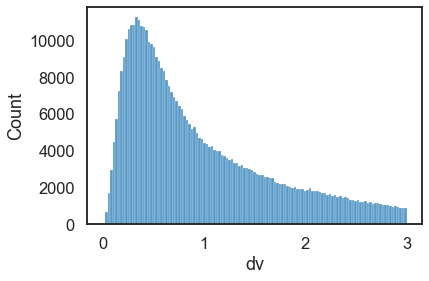

In [59]:
sns.histplot(tracks_grp.dv)

# Nearest Neighbours

In [60]:
def nb(pc):
    nb_count=3
    key_dist={}
    key_idx={}
    #print(len(pc))
    p1i=pc.reset_index().pid
    if len(pc)>nb_count:
        
        dmap=spatial.distance.squareform(spatial.distance.pdist(pc[['xs','ys','zs']].values))
        dmap_sorted=np.sort(dmap, axis=0)
        dmap_idx_sorted=np.argsort(dmap, axis=0)
        for i in range(nb_count):

            nb_dist=(dmap_sorted[i+1,:])
            nb_idx=dmap_idx_sorted[i+1,:]
            key_dist['nb_d_' + str(i)]=nb_dist
            key_idx['nb_i_' + str(i)]=pd.Series(nb_idx).map(p1i).values.astype('int').tolist()
        key_idx.update(key_dist)
    else:
        a = np.empty((len(pc)))
        a[:] = np.nan
        key_idx['nb_i_0']=a
    
    df=pd.DataFrame(key_idx)
    df=pd.concat([p1i, df], axis=1)
    
    return df


In [61]:
t_grp=pc.set_index('pid').groupby(['path', 'frame']).apply(nb).reset_index()

In [62]:
t_grp=t_grp.set_index('pid')

In [63]:
t_grp.head(3)#.T

,path,frame,level_2,nb_i_0,nb_i_1,nb_i_2,nb_d_0,nb_d_1,nb_d_2
pid,,,,,,,,,
0,210601_IVMTR114_Inj1_ASA_exp3,0,0,473,357,368,8.226685,10.002055,10.212538
1,210601_IVMTR114_Inj1_ASA_exp3,0,1,6,253,200,3.902759,11.264832,11.675832
2,210601_IVMTR114_Inj1_ASA_exp3,0,2,73,412,148,21.762654,22.252382,25.860253


In [64]:
nb_grp=t_grp.drop(['path', 'frame', 'level_2'], axis=1)

In [65]:
nb_grp.head(10)

,nb_i_0,nb_i_1,nb_i_2,nb_d_0,nb_d_1,nb_d_2
pid,,,,,,
0,473,357,368,8.226685,10.002055,10.212538
1,6,253,200,3.902759,11.264832,11.675832
2,73,412,148,21.762654,22.252382,25.860253
3,12,205,409,4.876546,6.258667,6.539379
4,28,16,98,3.921232,5.834189,9.181613
5,105,42,464,7.878616,10.216307,17.234344
6,1,200,253,3.902759,9.707725,10.538655
7,38,12,39,2.691664,3.411292,4.049856
8,442,144,293,8.728584,10.425448,11.328974


# Nearest Neighbours - Average

In [66]:
def nb(pc):
    nb_count=3
    nba_list=[5,10,15]
    key_dist={}
    key_idx={}
    #print(len(pc))
    p1i=pc.reset_index().pid
    if len(pc)>np.array(nba_list).max():
        
        dmap=spatial.distance.squareform(spatial.distance.pdist(pc[['xs','ys','zs']].values))
        dmap_sorted=np.sort(dmap, axis=0)
        #dmap_idx_sorted=np.argsort(dmap, axis=0)
        for i in nba_list:

            nb_dist=(dmap_sorted[1:(i+1),:]).mean(axis=0)
            #nb_idx=dmap_idx_sorted[i+1,:]
            key_dist['nba_d_' + str(i)]=nb_dist
            #key_idx['nb_i_' + str(i)]=pd.Series(nb_idx).map(p1i).values.astype('int').tolist()
        #key_idx.update(key_dist)
    else:
        a = np.empty((len(pc)))
        a[:] = np.nan
        key_dist[('nba_d_' + str(nba_list[0]))]=a
    
    df=pd.DataFrame(key_dist)
    df=pd.concat([p1i, df], axis=1)
    
    return df


In [67]:
t_grp=pc.set_index('pid').groupby(['path', 'frame']).apply(nb).reset_index()

In [68]:
t_grp=t_grp.set_index('pid')

In [69]:
nba_grp=t_grp.drop(['path', 'frame', 'level_2'], axis=1)

In [70]:
nba_grp.head(10)

,nba_d_5,nba_d_10,nba_d_15
pid,,,
0,10.269342,11.885358,13.028363
1,10.146977,12.073849,13.922724
2,24.739165,27.874862,30.697320
3,6.942839,9.261739,11.508236
4,9.687223,13.437265,16.638389
5,14.269093,17.336328,20.700165
6,9.139309,11.605684,13.242256
7,5.044965,7.869446,10.352590
8,11.697258,14.806407,17.544911


# Nearest Neighbours -  all colors

def nbc(pc):
    nb_count=3
    key_dist={}
    key_idx={}
    #print(len(pc))
    p1i=pc.reset_index().pid
    if len(pc)>nb_count:
        
        dmap=spatial.distance.squareform(spatial.distance.pdist(pc[['xs','ys','zs']].values))
        dmap_sorted=np.sort(dmap, axis=0)
        dmap_idx_sorted=np.argsort(dmap, axis=0)
        for i in range(nb_count):

            nb_dist=(dmap_sorted[i+1,:])
            nb_idx=dmap_idx_sorted[i+1,:]
            key_dist['nbc_d_' + str(i)]=nb_dist
            key_idx['nbc_i_' + str(i)]=pd.Series(nb_idx).map(p1i).values.astype('int').tolist()
        key_idx.update(key_dist)
    else:
        a = np.empty((len(pc)))
        a[:] = np.nan
        key_idx['nbc_i_0']=a
        
    
    df=pd.DataFrame(key_idx)
    df=pd.concat([p1i, df], axis=1)
    
    return df


t_grp=pc.set_index('pid').groupby(['path', 'frame']).apply(nbc).reset_index()

t_grp=t_grp.set_index('pid')

nbc_grp=t_grp.drop(['path', 'frame', 'level_2'], axis=1)

nbc_grp.sort_index().head()

# Nearest Neighbours -  all colors - Average

def nbca(pc):
    nb_count=3
    nba_list=[5,10,15]
    key_dist={}
    key_idx={}
    #print(len(pc))
    p1i=pc.reset_index().pid
    if len(pc)>np.array(nba_list).max():
        
        dmap=spatial.distance.squareform(spatial.distance.pdist(pc[['xs','ys','zs']].values))
        dmap_sorted=np.sort(dmap, axis=0)
        #dmap_idx_sorted=np.argsort(dmap, axis=0)
        for i in nba_list:

            nb_dist=(dmap_sorted[1:(i+1),:]).mean(axis=0)
            #nb_idx=dmap_idx_sorted[i+1,:]
            key_dist['nbca_d_' + str(i)]=nb_dist
            #key_idx['nb_i_' + str(i)]=pd.Series(nb_idx).map(p1i).values.astype('int').tolist()
        #key_idx.update(key_dist)
    else:
        a = np.empty((len(pc)))
        a[:] = np.nan
        key_dist[('nbca_d_' + str(nba_list[0]))]=a
    
    df=pd.DataFrame(key_dist)
    df=pd.concat([p1i, df], axis=1)
    
    return df


t_grp=pc.set_index('pid').groupby(['path', 'frame']).apply(nbca).reset_index()

t_grp=t_grp.set_index('pid')

nbca_grp=t_grp.drop(['path', 'frame', 'level_2'], axis=1)

nbca_grp.sort_index().head(10)

# Nearest Neighbours -  second color only

p=0
pc1=pc[pc.path==(pd.unique(pc.path)[p])]
#pc1=df[df.c==625]
pc1=pc1[pc1.frame==20]

pd.unique(pc.c)

def nbc2(pc1):
    c1=470
    c2=555

    nb_count=3
    key_dist={}
    key_idx={}


    #print(len(pc))
    if (len(pc1[pc1.c==c1])>nb_count) & (len(pc1[pc1.c==c2])>nb_count):
        pos1=pc1[pc1.c==c1]
        #print(len(pos1))
        p1i=pos1.reset_index().pid
        pos1=pos1[['xs','ys','zs']].values
        pos2=pc1[pc1.c==c2]
        #print(len(pos2))
        p2i=pos2.reset_index().pid
        pos2=pos2[['xs','ys','zs']].values

        dmap=spatial.distance.cdist(pos1, pos2)

        key_dist={}
        key_idx={}
        dmap_sorted=np.sort(dmap.T, axis=0)
        dmap_idx_sorted=np.argsort(dmap.T, axis=0)
        for i in range(nb_count):
            nb_dist=(dmap_sorted[i+1,:])
            nb_idx=dmap_idx_sorted[i+1,:]
            key_dist['nbc2_d_' + str(i)]=nb_dist
            key_idx['nbc2_i_' + str(i)]=pd.Series(nb_idx).map(p1i).values.astype('int').tolist()
        key_idx.update(key_dist)
        p1=pd.DataFrame(key_idx)
        p1=pd.concat([p1,p1i], axis=1).set_index('pid')

        key_dist={}
        key_idx={}
        dmap_sorted=np.sort(dmap, axis=0)
        dmap_idx_sorted=np.argsort(dmap, axis=0)
        for i in range(nb_count):
            nb_dist=(dmap_sorted[i+1,:])
            nb_idx=dmap_idx_sorted[i+1,:]
            key_dist['nbc2_d_' + str(i)]=nb_dist
            key_idx['nbc2_i_' + str(i)]=pd.Series(nb_idx).map(p2i).values.astype('int').tolist()
        key_idx.update(key_dist)
        p2=pd.DataFrame(key_idx)
        p2=pd.concat([p2,p2i], axis=1).set_index('pid')
        
        df=pd.concat([p1,p2], axis=0).sort_index()

    else:
        a = np.empty((len(pc1)))
        a[:] = np.nan
        key_idx['nbc2_i_0']=a
        pi=pc1.reset_index().pid
        df=pd.DataFrame(key_idx)
        df=pd.concat([df,pi], axis=1).set_index('pid')
    
    return df


t_grp=pc.set_index('pid').groupby(['path', 'frame']).apply(nbc2)

t_grp=t_grp.reset_index().set_index('pid')

nbc2_grp=t_grp.drop(['path', 'frame'], axis=1)

nbc2_grp.head()

# DBSCAN

In [71]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
#from sklearn.datasets.samples_generator import make_blobs
#from sklearn.preprocessing import StandardScaler

def cluster(pc):
    
    
    min_samples=5
    
    eps_list=[5,7.5,10,15,20]
    
    cl_=[]
    
    #X=pos[:,:-1] # 2D
    X=pc[['xs','ys','zs']].values # 3D
    
    for eps in eps_list:
        # Compute DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

        #print('Estimated number of clusters: %d' % n_clusters_)
        
        cl_.append(pd.DataFrame({('cl_idx_' + str(eps) ) : (labels)}))
                     
    

        
    ##############################################################################
    # Plot result

    # Black removed and is used for noise instead.
    
#    unique_labels = set(labels)
#    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
#    for k, col in zip(unique_labels, colors):
#        if k == -1:
#            # Black used for noise.
#            col = 'k'

#        class_member_mask = (labels == k)

#        xy = X[class_member_mask & core_samples_mask]
#       plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
#                 markeredgecolor='k', markersize=8)

#        xy = X[class_member_mask & ~core_samples_mask]
#        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
#                 markeredgecolor='k', markersize=3)

#    plt.title('Estimated number of clusters: %d' % n_clusters_)
#    plt.show()
    cl_.append(pc.reset_index().pid)
    return (pd.concat(cl_, axis=1))

In [72]:
t_grp=pc.groupby(['path', 'frame']).apply(cluster).reset_index()

In [73]:
cl_grp=t_grp.drop(['path', 'frame', 'level_2'], axis=1)


In [74]:
cl_grp=cl_grp.set_index('pid')

In [75]:
cl_grp.head(10)

,cl_idx_5,cl_idx_7.5,cl_idx_10,cl_idx_15,cl_idx_20
pid,,,,,
0,-1,-1,6,0,0
1,-1,-1,-1,0,0
2,-1,-1,-1,-1,-1
3,-1,0,0,1,0
4,-1,-1,-1,0,0
5,-1,-1,-1,0,0
6,-1,-1,4,0,0
7,-1,0,0,1,0
8,-1,-1,9,0,0


# DBSCAN 2

In [76]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
#from sklearn.datasets.samples_generator import make_blobs
#from sklearn.preprocessing import StandardScaler

def cluster_d(pc):
    
    min_samples=5
    
    eps_list=np.arange(3, 31, 2)
    
    cl_=[]
    
    #X=pos[:,:-1] # 2D
    X=pc[['xs','ys','zs']].values # 3D
    
    for eps in eps_list:
        # Compute DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

        #print('Estimated number of clusters: %d' % n_clusters_)
        
        labels[labels>-1]=eps
        labels[labels==-1]=42
        
               
        cl_.append(pd.DataFrame({('cl_idx_' + str(eps) ) : (labels)}))
    cld_grp=pd.concat(cl_, axis=1)
    cld_grp=pd.DataFrame({('cld' ) : (cld_grp.min(axis=1))})
    
                     
        

        
    ##############################################################################
    # Plot result

    # Black removed and is used for noise instead.
    
#    unique_labels = set(labels)
#    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
#    for k, col in zip(unique_labels, colors):
#        if k == -1:
#            # Black used for noise.
#            col = 'k'

#        class_member_mask = (labels == k)

#        xy = X[class_member_mask & core_samples_mask]
#       plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
#                 markeredgecolor='k', markersize=8)

#        xy = X[class_member_mask & ~core_samples_mask]
#        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
#                 markeredgecolor='k', markersize=3)

#    plt.title('Estimated number of clusters: %d' % n_clusters_)
#    plt.show()
    cld_grp['pid']=(pc.reset_index().pid)
    return (cld_grp)

In [77]:
t_grp=pc.groupby(['path', 'frame']).apply(cluster_d).reset_index()

In [78]:
t_grp.tail()

,path,frame,level_2,cld,pid
754311,210601_IVMTR114_Inj3_ASA_exp3,193,994,7,754311
754312,210601_IVMTR114_Inj3_ASA_exp3,193,995,9,754312
754313,210601_IVMTR114_Inj3_ASA_exp3,193,996,17,754313
754314,210601_IVMTR114_Inj3_ASA_exp3,193,997,7,754314
754315,210601_IVMTR114_Inj3_ASA_exp3,193,998,15,754315


In [79]:
cld_grp=t_grp.drop(['path', 'frame', 'level_2'], axis=1)


In [80]:
cld_grp=cld_grp.set_index('pid')

In [81]:
cld_grp.head(10)

,cld
pid,
0,11
1,11
2,23
3,7
4,11
5,15
6,11
7,7
8,9


# Stability 2, pc only

In [82]:
def do_tstab(tgrp):
    ocp_=[]
    first=True
    #print(len(tgrp))
    for i, grp in tgrp.groupby(['frame']):
        pos=grp[['xs','ys','zs']].values
        if first:
            first=False
        else:
            dmap=spatial.distance.cdist(t1, pos)
            dmap_sorted=np.sort(dmap, axis=1)
            data=dmap_sorted[:,0]

            ocp_.append(pd.DataFrame({'stab' : data}))#, 'pid': grp.pid}))

        t1=pos
    data=np.zeros(len(pos))
    data[:]=np.nan
    ocp_.append(pd.DataFrame({'stab' : data}))#, 'pid':grp.pid}))

    ocp=pd.concat(ocp_, axis=0).reset_index()
    ocp['pid']=tgrp.reset_index().pid
    
    return ocp

In [83]:
t_grp=pc.groupby(['path']).apply(do_tstab)

In [84]:
stab_grp=t_grp.reset_index()[['stab', 'pid']]

In [85]:
stab_grp=stab_grp.set_index('pid').sort_index()

In [86]:
stab_grp.head(10)

,stab
pid,
0,2.881135
1,4.162007
2,11.729086
3,5.514100
4,8.968283
5,5.297424
6,2.030290
7,5.397845
8,12.325997


# Point depth

In [87]:
def depth(pos):
    
    fill_dist=15
    
    pos_max=pos[['xs', 'ys', 'zf']].max()

    zsize=int(pos_max['zf']*1.5)
    xsize=int(pos_max['xs']*1.1)
    ysize=int(pos_max['ys']*1.1)

    pcc=np.zeros((xsize+2,ysize+2,zsize+2))
    pc_pos=pos[['xs', 'ys', 'zf']].values

    #zfloor=int(np.percentile(pc_pos[:,2],2))
    zfloor=1
    pc_pos[pc_pos<0]=0
    pc_pos=pc_pos.astype('int').T
    
    pc_pos=pc_pos.tolist()
      
    pcc[pc_pos]=1
    pcc[:,:,:zfloor]=1

    pcd=ndimage.morphology.distance_transform_edt(pcc==0)

    #plt.figure(figsize=(10,3))
    #plt.imshow((pcd[300,:,:]).T, cmap='jet', vmin=0, vmax=20)
    #plt.colorbar()

    pca=pcd<fill_dist

    pca=ndimage.binary_fill_holes(pca)

    #plt.figure(figsize=(10,3))
    #plt.imshow((pca[300,:,:]).T, cmap='jet', vmin=0, vmax=2)
    #plt.colorbar()

    pcad=ndimage.morphology.distance_transform_edt(pca)

    #plt.figure(figsize=(10,3))
    #plt.imshow((pcad[300,:,:]).T, cmap='jet', vmin=0, vmax=40)
    #plt.colorbar()

    pdepth=pcad[pc_pos]-fill_dist
           
    depth_grp=pd.DataFrame({'depth' : (pdepth)})
    
    depth_grp['pid']=pos.reset_index().pid
    
    return depth_grp


In [88]:
def depth(pos_grp):
    
    fill_dist=15
    
    pos_max=pos_grp[['xs', 'ys', 'zf']].max()

    zsize=int(pos_max['zf']*1.5)
    xsize=int(pos_max['xs']*1.1)
    ysize=int(pos_max['ys']*1.1)

    depth_grp_=[]
    
    for i, pos in pos_grp.groupby('frame'):
    
        pcc=np.zeros((xsize+2,ysize+2,zsize+2))
        
        pc_pos=pos[['xs', 'ys', 'zf']].values
        
        zfloor=1
        pc_pos[pc_pos<0]=0
        pc_pos=pc_pos.astype('int').T

        pc_pos=pc_pos.tolist()

        pcc[pc_pos]=1
        pcc[:,:,:zfloor]=1

        pcd=ndimage.morphology.distance_transform_edt(pcc==0)
        pca=pcd<fill_dist

        pca=ndimage.binary_fill_holes(pca)
        pcad=ndimage.morphology.distance_transform_edt(pca)
        pdepth=pcad[pc_pos]-fill_dist

        depth_grp=pd.DataFrame({'depth' : (pdepth)})

        depth_grp['pid']=pos.reset_index().pid
        
        depth_grp_.append(depth_grp)
    
    depth_grp_=pd.concat(depth_grp_, axis=0)
    return depth_grp_


In [89]:
t_grp=pc.groupby(['path']).apply(depth).reset_index()   

In [90]:
depth_grp=t_grp[['pid', 'depth']]

In [91]:
depth_grp=depth_grp.set_index('pid').sort_index()

In [92]:
depth_grp.tail(10)

,depth
pid,
754306,25.472213
754307,4.000000
754308,1.309506
754309,14.017236
754310,9.535688
754311,21.027767
754312,23.183766
754313,26.737274
754314,19.073450


# Export

In [93]:
base_name = '211009_problemfiles'

In [94]:
folder='./mods/'
#/tmp/year
#os.mkdir(folder)
base_name=folder + base_name 

In [95]:
#pc=pc.set_index('pid')
pc.to_pickle(base_name + '_pc_mod')
print(len(pc))
pc.head()

754316


,pid,path,frame,xs,ys,zs,c0_mean,c0_max,c1_mean,c1_max,c2_mean,c2_max,vol,elong,flatness,treatment,cohort,eigval_0,eigval_1,eigval_2,zf,inh,inj,date,mouse
0,0,210601_IVMTR114_Inj1_ASA_exp3,0,41.595911,13.278221,12.428152,399.953079,1773,211.137830,391,637.002933,2245,173.409549,0.761000,0.696784,problem-children,timeseries_seg,13.661179,11.175504,5.749707,7.041967,ASA,1.0,210601,114.0
1,1,210601_IVMTR114_Inj1_ASA_exp3,0,-72.779990,-41.502866,20.000000,153.440678,357,182.847458,262,228.559322,437,30.003412,0.736198,0.393620,problem-children,timeseries_seg,10.524562,5.704174,4.820388,14.613815,ASA,1.0,210601,114.0
2,2,210601_IVMTR114_Inj1_ASA_exp3,0,8.197179,-189.181779,4.000000,148.285714,301,160.581633,257,239.928571,587,49.836176,0.879947,0.841737,problem-children,timeseries_seg,18.840587,14.588383,4.252204,-1.386185,ASA,1.0,210601,114.0
3,3,210601_IVMTR114_Inj1_ASA_exp3,0,71.641604,-48.279618,26.000000,148.987654,300,192.530864,287,263.666667,647,41.191125,0.934817,0.925031,problem-children,timeseries_seg,20.421277,17.845798,2.575480,20.613815,ASA,1.0,210601,114.0
4,4,210601_IVMTR114_Inj1_ASA_exp3,0,-42.994867,68.124232,24.000000,134.861111,210,170.027778,253,218.694444,500,18.307167,0.762460,0.529011,problem-children,timeseries_seg,5.940586,3.453534,2.487053,18.613815,ASA,1.0,210601,114.0


In [96]:
stab_grp.to_pickle(base_name + '_stab')
print(len(stab_grp))
stab_grp.head()

754316


,stab
pid,
0,2.881135
1,4.162007
2,11.729086
3,5.514100
4,8.968283


In [97]:
cl_grp.sort_index().to_pickle(base_name + '_cl')
print(len(cl_grp))
cl_grp.sort_index().tail()

754316


,cl_idx_5,cl_idx_7.5,cl_idx_10,cl_idx_15,cl_idx_20
pid,,,,,
754311,-1,1,0,0,0
754312,-1,-1,0,0,0
754313,-1,-1,-1,-1,1
754314,-1,1,0,0,0
754315,-1,-1,-1,0,0


In [98]:
cld_grp.sort_index().to_pickle(base_name + '_cld')
print(len(cld_grp))
cld_grp.sort_index().tail()

754316


,cld
pid,
754311,7
754312,9
754313,17
754314,7
754315,15


In [99]:
#tracks_grp=tracks_grp.set_index('pid')
tracks_grp.to_pickle(base_name + '_tracks')
print(len(tracks_grp))
tracks_grp.head()

754316


,dvx,dvy,dvz,dv,particle
pid,,,,,
0,-1.853289,-0.994715,1.968959,2.881135,0
1,NaN,NaN,NaN,NaN,358
2,NaN,NaN,NaN,NaN,357
3,NaN,NaN,NaN,NaN,356
4,NaN,NaN,NaN,NaN,355


In [100]:
depth_grp.to_pickle(base_name + '_depth')
print(len(depth_grp))
depth_grp.head()

754316


,depth
pid,
0,0.842980
1,12.964263
2,21.742346
3,1.673332
4,0.000000


## Neighbours

In [101]:
nb_grp.to_pickle(base_name + '_nb')
print(len(nb_grp))
nb_grp.tail()

754316


,nb_i_0,nb_i_1,nb_i_2,nb_d_0,nb_d_1,nb_d_2
pid,,,,,,
754311,754207,753921,754285,3.277905,5.675072,5.686390
754312,753988,753796,753970,7.962727,8.681913,8.813460
754313,753473,753559,753545,11.863291,14.527387,15.152293
754314,754295,754141,753453,2.978801,5.335509,6.339693
754315,753365,753787,753682,14.590184,15.296205,16.759570


nbc_grp.to_pickle(base_name + '_nbc')
print(len(nbc_grp))
nbc_grp.tail()

In [102]:
nba_grp.to_pickle(base_name + '_nba')
print(len(nba_grp))
nba_grp.tail()

754316


,nba_d_5,nba_d_10,nba_d_15
pid,,,
754311,5.549217,6.583652,7.258288
754312,8.736721,9.990416,10.963078
754313,15.466491,17.770745,19.425253
754314,5.657683,6.675613,7.458884
754315,16.440134,18.624917,19.990033


nbca_grp.to_pickle(base_name + '_nbca')
print(len(nbca_grp))
nbca_grp.tail()

nbc2_grp.to_pickle(base_name + '_nbc2')
print(len(nbc2_grp))
nbc2_grp.tail()

# Addon tracking - contraction component (förstör pc)

In [103]:
#pc=pc.reset_index()
pc.head()

,pid,path,frame,xs,ys,zs,c0_mean,c0_max,c1_mean,c1_max,c2_mean,c2_max,vol,elong,flatness,treatment,cohort,eigval_0,eigval_1,eigval_2,zf,inh,inj,date,mouse
0,0,210601_IVMTR114_Inj1_ASA_exp3,0,41.595911,13.278221,12.428152,399.953079,1773,211.137830,391,637.002933,2245,173.409549,0.761000,0.696784,problem-children,timeseries_seg,13.661179,11.175504,5.749707,7.041967,ASA,1.0,210601,114.0
1,1,210601_IVMTR114_Inj1_ASA_exp3,0,-72.779990,-41.502866,20.000000,153.440678,357,182.847458,262,228.559322,437,30.003412,0.736198,0.393620,problem-children,timeseries_seg,10.524562,5.704174,4.820388,14.613815,ASA,1.0,210601,114.0
2,2,210601_IVMTR114_Inj1_ASA_exp3,0,8.197179,-189.181779,4.000000,148.285714,301,160.581633,257,239.928571,587,49.836176,0.879947,0.841737,problem-children,timeseries_seg,18.840587,14.588383,4.252204,-1.386185,ASA,1.0,210601,114.0
3,3,210601_IVMTR114_Inj1_ASA_exp3,0,71.641604,-48.279618,26.000000,148.987654,300,192.530864,287,263.666667,647,41.191125,0.934817,0.925031,problem-children,timeseries_seg,20.421277,17.845798,2.575480,20.613815,ASA,1.0,210601,114.0
4,4,210601_IVMTR114_Inj1_ASA_exp3,0,-42.994867,68.124232,24.000000,134.861111,210,170.027778,253,218.694444,500,18.307167,0.762460,0.529011,problem-children,timeseries_seg,5.940586,3.453534,2.487053,18.613815,ASA,1.0,210601,114.0


In [104]:
pc1=pd.concat([pc[['path', 'xs', 'ys', 'zf', 'pid','frame']].set_index('pid'), tracks_grp], axis=1).sort_index()

In [105]:
def contract(t2):
    #xmed, ymed =(t2[t2.frame<50]['xs'].median(), t2[t2.frame<50]['ys'].median())
    #xmed, ymed =(t2['xs'].median(), t2['ys'].median())

    #t2['xm']=t2['xs']-xmed
    #t2['ym']=t2['ys']-ymed

    #t2['cont']=((-t2['xm'])*t2['dvx'] + (-t2['ym'])*t2['dvy'] + (-t2['zf'])*t2['dvz'] )/((t2['xm'])**2 + (t2['ym'])**2 + (t2['zf'])**2)**0.5
    t2['cont']=((-t2['xs'])*t2['dvx'] + (-t2['ys'])*t2['dvy'] + (-t2['zf'])*t2['dvz'] )/((t2['xs'])**2 + (t2['ys'])**2 + (t2['zf'])**2)**0.5
    t2['cont_p']=t2.cont/t2.dv
    
    
    
    return pd.DataFrame({'cont' : (t2['cont']), 'cont_p' : (t2['cont_p']), 'pid':t2['pid']})

In [106]:
cont_grp=pc1.reset_index().groupby(['path']).apply(contract)
cont_grp=cont_grp.set_index('pid').sort_index()

In [107]:
cont_grp.to_pickle(base_name + '_cont')
print(len(cont_grp))
cont_grp.head()

754316


,cont,cont_p
pid,,
0,1.728133,0.59981
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


# Nytt paket med lite nya numeriska variabler som beskriver tracking och totala rorelser 

In [108]:
#Skapar dataframe med grundpaket plus tracking plus kontraktions
pc1=pd.concat([pc[['path', 'xs', 'ys', 'zf', 'pid','frame']].set_index('pid'), tracks_grp,cont_grp], axis=1).sort_index()

In [109]:
pc1.head()

,path,xs,ys,zf,frame,dvx,dvy,dvz,dv,particle,cont,cont_p
pid,,,,,,,,,,,,
0,210601_IVMTR114_Inj1_ASA_exp3,41.595911,13.278221,7.041967,0,-1.853289,-0.994715,1.968959,2.881135,0,1.728133,0.59981
1,210601_IVMTR114_Inj1_ASA_exp3,-72.779990,-41.502866,14.613815,0,NaN,NaN,NaN,NaN,358,NaN,NaN
2,210601_IVMTR114_Inj1_ASA_exp3,8.197179,-189.181779,-1.386185,0,NaN,NaN,NaN,NaN,357,NaN,NaN
3,210601_IVMTR114_Inj1_ASA_exp3,71.641604,-48.279618,20.613815,0,NaN,NaN,NaN,NaN,356,NaN,NaN
4,210601_IVMTR114_Inj1_ASA_exp3,-42.994867,68.124232,18.613815,0,NaN,NaN,NaN,NaN,355,NaN,NaN


In [110]:
#Satter index pa path och particle for att kunna konkaternera dataframe senare
pc1=pc1.reset_index().set_index(['path','particle'])

#Grupperar data pa path och partikel for att kunna analysera olika partiklar for sig
grouped=pc1.groupby(['path','particle'])
#Raknar antalet observationer for varje unik partikel
counted=grouped.count()
#Variabeln nrtracks kollar hur manga tracks en viss partikel ar trackad
pc1['nrtracks']=counted.frame

#Adderar de olika variablerna och beraknar summan av alla observationer
summed=grouped.sum()
#cont_tot summerar den totala kontraktionen for en partikel
pc1['cont_tot']=summed.cont
# displ_tot summerar den totala forflyttningen for en partikel
pc1['displ_tot']=abs(summed.dvx)+abs(summed.dvy)
# dvz_tot summerar den totala forflyttningen i z-led for en partikel
pc1['dvz_tot']=summed.dvz
# dvz_tot summerar den totala forflyttningen i y-led for en partikel
pc1['dvy_tot']=summed.dvy

In [111]:
#Satter om index till pid for att ha ett unikt index for varje observation
pc1=pc1.reset_index().set_index('pid')
# Tracknr raknar vilken trackning i ordningen en viss observation ar
tracknr=pc1.groupby(['path','particle'])['frame'].rank()
pc1['tracknr']=tracknr

#Kontrollerar att de nya variablerna fungerar som de ska
pc1.loc[pc1.nrtracks>5,['path','particle','frame','tracknr','nrtracks','cont_tot','displ_tot','dvz_tot','dvy_tot']].set_index(['path','particle','frame']).sort_index().head(20)

tracknr  nrtracks   cont_tot  \
path                          particle frame                                 
210601_IVMTR114_Inj1_ASA_exp3 0        0          1.0       107  10.107936   
                                       1          2.0       107  10.107936   
                                       2          3.0       107  10.107936   
                                       3          4.0       107  10.107936   
                                       4          5.0       107  10.107936   
                                       5          6.0       107  10.107936   
                                       6          7.0       107  10.107936   
                                       7          8.0       107  10.107936   
                                       8          9.0       107  10.107936   
                                       9         10.0       107  10.107936   
                                       10        11.0       107  10.107936   
                                       11        12.0       107  10.107936   
                                       12        13.0       107  10.107936   
                                       13        14.0       107  10.107936   
                                       14        15.0       107  10.107936   
                                       15        16.0       107  10.107936   
                                       16        17.0       107  10.107936   
                                       17        18.0       107  10.107936   
                                       18        19.0       107  10.107936   
                                       19        20.0       107  10.107936   

                                              displ_tot   dvz_tot  dvy_tot  
path                          particle frame                                
210601_IVMTR114_Inj1_ASA_exp3 0        0      14.047756 -4.380533 -6.29932  
                                       1      14.047756 -4.380533 -6.29932  
                                       2      14.047756 -4.380533 -6.29932  
                                       3      14.047756 -4.380533 -6.29932  
                                       4      14.047756 -4.380533 -6.29932  
                                       5      14.047756 -4.380533 -6.29932  
                                       6      14.047756 -4.380533 -6.29932  
                                       7      14.047756 -4.380533 -6.29932  
                                       8      14.047756 -4.380533 -6.29932  
                                       9      14.047756 -4.380533 -6.29932  
                                       10     14.047756 -4.380533 -6.29932  
                                       11     14.047756 -4.380533 -6.29932  
                                       12     14.047756 -4.380533 -6.29932  
                                       13     14.047756 -4.380533 -6.29932  
                                       14     14.047756 -4.380533 -6.29932  
                                       15     14.047756 -4.380533 -6.29932  
                                       16     14.047756 -4.380533 -6.29932  
                                       17     14.047756 -4.380533 -6.29932  
                                       18     14.047756 -4.380533 -6.29932  
                                       19     14.047756 -4.380533 -6.29932

In [112]:
xtra_tracking=pc1.loc[:,['tracknr','nrtracks','cont_tot','displ_tot','dvz_tot']]
xtra_tracking.to_pickle(base_name + '_xtratracking')
print(len(xtra_tracking))
xtra_tracking.head()

754316


,tracknr,nrtracks,cont_tot,displ_tot,dvz_tot
pid,,,,,
0,1.0,107,10.107936,14.047756,-4.380533
1,1.0,1,0.000000,0.000000,0.000000
2,1.0,1,0.000000,0.000000,0.000000
3,1.0,1,0.000000,0.000000,0.000000
4,1.0,1,0.000000,0.000000,0.000000


In [113]:
os.getcwd()

'C:\\Users\\nikbo14\\Google Drive\\IVM sharing\\IVM Tracking\\Scripts\\New pipeline 210920'